# Running a LAMMPS job in pyiron

This notebook __doesn't__ work out of the box if you haven't configured LAMMPS for pyiron

conda install -c conda-forge lammps 
OR
mamba install -c conda-forge lammps

In the python environment in which you are running pyiron

WARNING: In practice/production you should configure a compiled LAMMPS executable that is optimised for your cluster!

In [14]:
from pyiron.project import Project

In [15]:
pr = Project("run_lammps_calc")

Create the structure that we're going to use:
128 atom BCC Fe cell

In [16]:
structure = pr.create.structure.ase.bulk("Fe",crystalstructure="bcc", cubic=True) * [4, 4, 4]
print(len(structure))

128


Create the pyiron job, assign the structure to the job.

In [17]:
job = pr.create_job(job_type=pr.job_type.Lammps, job_name='Al_T800K')

job.structure = structure

We need to see the potentials, pyiron has an inbuilt potential database

It automatically finds the applicable potentials given the structure provided.

In [18]:
job.list_potentials()

['1997--Ackland-G-J--Fe--LAMMPS--ipr1',
 '1998--Meyer-R--Fe--LAMMPS--ipr1',
 '2001--Lee-B-J--Fe--LAMMPS--ipr1',
 '2001--Lee-B-J--Fe-Cr--LAMMPS--ipr1',
 '2003--Mendelev-M-I--Fe-2--LAMMPS--ipr3',
 '2003--Mendelev-M-I--Fe-5--LAMMPS--ipr1',
 '2004--Ackland-G-J--Fe-P--LAMMPS--ipr1',
 '2004--Zhou-X-W--Fe--LAMMPS--ipr2',
 '2005--Lee-B-J--Fe-Cu--LAMMPS--ipr1',
 '2005--Mendelev-M-I--Al-Fe--LAMMPS--ipr1',
 '2006--Chamati-H--Fe--LAMMPS--ipr1',
 '2006--Kim-J--Fe-Pt--LAMMPS--ipr1',
 '2006--Lee-B-J--Fe-C--LAMMPS--ipr1',
 '2006--Lee-B-J--Fe-N--LAMMPS--ipr1',
 '2007--Lee-B-J--Fe-H--LAMMPS--ipr1',
 '2007--Mendelev-M-I--V-Fe--LAMMPS--ipr1',
 '2008--Hepburn-D-J--Fe-C--LAMMPS--ipr1',
 '2008--Sa-I--Fe-Nb--LAMMPS--ipr1',
 '2008--Sa-I--Fe-Ti--LAMMPS--ipr1',
 '2009--Bonny-G--Fe-Cu-Ni--LAMMPS--ipr1',
 '2009--Bonny-G--Fe-Ni--LAMMPS--ipr1',
 '2009--Kim-H-K--Fe-Ti-C--LAMMPS--ipr2',
 '2009--Kim-Y-M--Fe-Mn--LAMMPS--ipr1',
 '2009--Olsson-P-A-T--Fe--LAMMPS--ipr1',
 '2009--Stukowski-A--Fe-Cr--LAMMPS--ipr1',
 '2010--Ki

Set the potential 

In [19]:
pot = job.list_potentials()[0]
job.potential = pot
print ('Selected potential: ', pot)

Selected potential:  1997--Ackland-G-J--Fe--LAMMPS--ipr1


Here we can use the calc_md() method attached to the lammps job.
Run at 0 pressure, temperature 1000K, for 10000 ionic steps @ 1fs/step

In [20]:
job.calc_md(temperature=1000,
            pressure=0,
            n_ionic_steps=10000,
            time_step=1)

# If we want to set cores
# job.server.cores = 16
# Queue name
# job.server.queue = "yourqueuename"
# job.run(run_mode="queue")
job.run(delete_existing_job=True)

The job Al_T800K was saved and received the ID: 10


Look at output

In [21]:
job['output']

{'groups': ['generic', 'structure'], 'nodes': []}

In [22]:
job['output/generic/energy_tot']

array([-519.60472951, -520.31022857, -518.85599419, -518.23333594,
       -519.10912889, -519.34228265, -518.46516833, -517.58394546,
       -516.92867353, -518.26686374, -520.59855531, -520.64516505,
       -519.55089525, -516.29642816, -515.26183071, -517.06102653,
       -519.00397135, -519.80228505, -520.01710726, -519.22040093,
       -516.88015128, -516.88147294, -519.02490068, -521.07167436,
       -520.95514108, -519.77062747, -518.92788351, -518.45954449,
       -518.63034176, -519.42133748, -520.54598092, -520.49450118,
       -518.79191519, -516.68587844, -516.79219895, -520.29299259,
       -521.01573455, -519.88744209, -518.26755574, -517.54611914,
       -517.79469864, -520.54262417, -521.47146933, -520.31834969,
       -517.80298903, -517.10164703, -518.08732855, -519.21126555,
       -519.83462038, -520.23654594, -520.67550633, -519.41073618,
       -518.02582228, -517.00867794, -517.61445983, -520.83044595,
       -521.13216827, -519.40757432, -517.87988642, -517.79837

Get the z coordinate of the 5th atom in the structure for every single frame

In [23]:
third_coordinate = job['output/generic/positions'][:, 5, 2]
print(third_coordinate)

[0.00000000e+00 2.08344856e-02 1.15650871e+01 1.13767688e+01
 2.61619465e-02 1.15396078e+01 1.15247247e+01 1.15799042e+01
 1.79119567e-01 1.13519455e+01 2.70906702e-03 1.14992180e+01
 1.15620257e+01 1.09182956e-01 1.14877549e+01 1.77463723e-01
 5.77065564e-02 9.80090458e-03 1.14367157e+01 7.73095212e-02
 1.13880330e+01 1.15959894e+01 1.68157535e-01 1.13210849e+01
 1.52218960e-01 3.39066747e-02 1.15105318e+01 1.15644487e+01
 1.13798072e-01 6.85278432e-02 1.14691169e+01 9.05702743e-02
 1.13309891e+01 2.17620630e-01 1.15353073e+01 1.13980833e-01
 1.13346674e+01 9.30069276e-02 1.14939008e+01 1.14947568e+01
 1.35027450e-01 1.14317903e+01 2.60139529e-01 1.13931941e+01
 1.15881395e+01 5.52243632e-02 2.49307612e-02 1.86240860e-01
 1.14298377e+01 1.39056592e-01 1.13854204e+01 2.28635776e-01
 1.14077317e+01 1.15858164e+01 1.14949435e+01 3.53537966e-02
 1.15881559e+01 2.89357013e-02 1.16151715e+01 1.45579814e-02
 1.15225042e+01 1.15480632e+01 1.30711664e-01 1.13041166e+01
 1.16040347e+01 1.641561

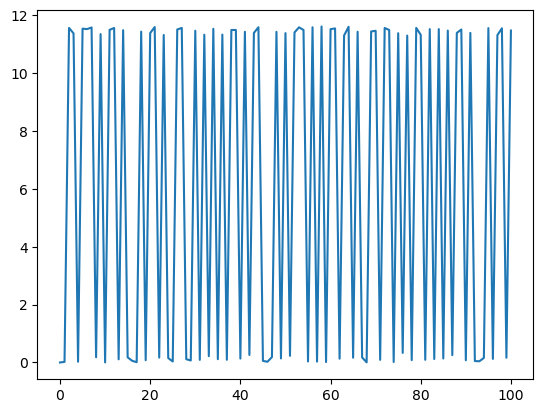

In [24]:
import matplotlib.pyplot as plt

plt.plot(third_coordinate)

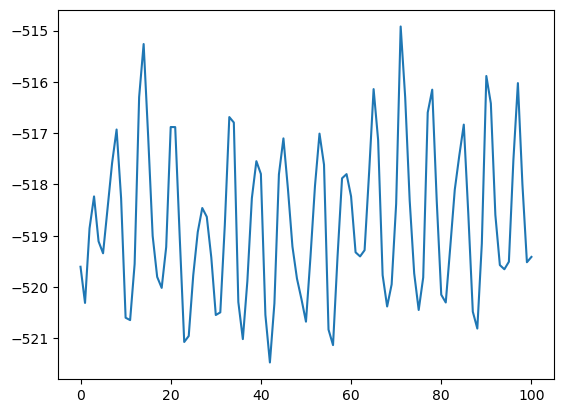

In [25]:
plt.plot(job['output/generic/energy_tot'])

If NGLView is installed, we can also plot an animated trajectory of the atoms:

In [26]:
job.animate_structures()

NGLWidget(max_frame=100)